In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Leemos fichero de datos
df_Fake = pd.read_csv('/content/sample_data/Fake.csv')
df_True = pd.read_csv('/content/sample_data/True.csv')

#Añadimos la clase a los dataframe
df_Fake['clase'] = 'FAKE'
df_True['clase'] = 'REAL'

print(df_Fake.head())
print(df_True.head())

print(df_Fake.columns.values)
print(df_Fake.shape)
print(df_True.columns.values)
print(df_True.shape)
df_True.drop_duplicates()
print(df_True.shape)


                                               title  ... clase
0   Donald Trump Sends Out Embarrassing New Year’...  ...  FAKE
1   Drunk Bragging Trump Staffer Started Russian ...  ...  FAKE
2   Sheriff David Clarke Becomes An Internet Joke...  ...  FAKE
3   Trump Is So Obsessed He Even Has Obama’s Name...  ...  FAKE
4   Pope Francis Just Called Out Donald Trump Dur...  ...  FAKE

[5 rows x 5 columns]
                                               title  ... clase
0  As U.S. budget fight looms, Republicans flip t...  ...  REAL
1  U.S. military to accept transgender recruits o...  ...  REAL
2  Senior U.S. Republican senator: 'Let Mr. Muell...  ...  REAL
3  FBI Russia probe helped by Australian diplomat...  ...  REAL
4  Trump wants Postal Service to charge 'much mor...  ...  REAL

[5 rows x 5 columns]
['title' 'text' 'subject' 'date' 'clase']
(23481, 5)
['title' 'text' 'subject' 'date' 'clase']
(21417, 5)
(21417, 5)


In [ ]:
#Solamente necesitamos las columnas de text y clase
df_Fake = df_Fake[['title','clase']]
df_True = df_True[['title','clase']]
df = pd.concat([df_Fake, df_True])
df = df.reset_index()
print(df_True.columns.values)
print(df['title'])
print(df.shape)
print(df.head())
df.drop_duplicates()
print(df.shape)


['title' 'clase']
0         Donald Trump Sends Out Embarrassing New Year’...
1         Drunk Bragging Trump Staffer Started Russian ...
2         Sheriff David Clarke Becomes An Internet Joke...
3         Trump Is So Obsessed He Even Has Obama’s Name...
4         Pope Francis Just Called Out Donald Trump Dur...
                               ...                        
44893    'Fully committed' NATO backs new U.S. approach...
44894    LexisNexis withdrew two products from Chinese ...
44895    Minsk cultural hub becomes haven from authorities
44896    Vatican upbeat on possibility of Pope Francis ...
44897    Indonesia to buy $1.14 billion worth of Russia...
Name: title, Length: 44898, dtype: object
(44898, 3)
   index                                              title clase
0      0   Donald Trump Sends Out Embarrassing New Year’...  FAKE
1      1   Drunk Bragging Trump Staffer Started Russian ...  FAKE
2      2   Sheriff David Clarke Becomes An Internet Joke...  FAKE
3      3   Trump

In [ ]:
#Comprobamos que no hay valores null
print(df.isnull().sum())


index    0
title    0
clase    0
dtype: int64


FAKE    23481
REAL    21417
Name: clase, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


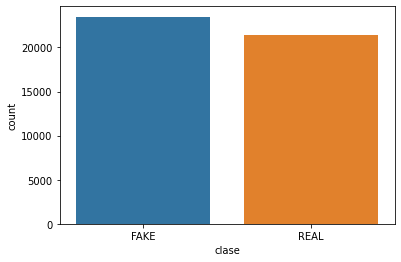

In [ ]:
#Vemos si la clase esta balanceada
print(df['clase'].value_counts())

sns.countplot(df['clase'])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
import re
import nltk
nltk.download('punkt')
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

f = open('/content/sample_data/stop_words_english.txt')
stop = []
for linea in f:
  stop.append(linea)
'''
ps = PorterStemmer()
#print(df['title'][0])
corpus=[]
sentences=[]
for i in range(0,len(df)):
    review=re.sub('[^a-zA-Z]',' ', df['title'][i])
    review=review.lower()
    list=review.split()
    review=[ps.stem(word) for word in list if word not in stop]
    sentences=' '.join(review)
    corpus.append(sentences)

print(corpus[0])
#Conjuntos

X = pd.DataFrame(corpus)
print(X.shape)
print(X)
y = df['clase']

'''
'''
sb = SnowballStemmer('english')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(0,len(df)):
    tokens = [word for sent in nltk.sent_tokenize(df['title'][i]) for word in nltk.word_tokenize(sent)]
    #print(tokens)
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [lemmatizer.lemmatize(t) for t in filtered_tokens if t not in stop]
    #print(stems)
    a = ' '.join(stems).lower()
    #print(a)
    corpus.append(a)
print(corpus)
'''
'''
X = pd.DataFrame(corpus)
print(X.shape)
print(X)
y = df['clase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

print(X_train)
print(y_train)
'''

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



"\nX = pd.DataFrame(corpus)\nprint(X.shape)\nprint(X)\ny = df['clase']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)\n\nprint(X_train)\nprint(y_train)\n"

In [ ]:
import itertools
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics

#Tranformacion tf-idf
vectorizer=TfidfVectorizer(ngram_range = (1,3))

X = vectorizer.fit_transform(corpus)
y = df['clase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)
#print(X_train)
#print(y_train)

#tfidf_train = vectorizer.fit_transform(X_train)
#tfidf_test = vectorizer.transform(X_test)


#Entrenamiento
classifiers = {
    #'LogisticRegression': (LogisticRegression, {}),
    'MultinomialNB': (MultinomialNB, {}),
    'PAC': (PassiveAggressiveClassifier, {})
    #'DecisionTreeClassifier': (DecisionTreeClassifier, {}),
    #'RandomForest': (RandomForestClassifier, {}) 
}

resultados = []

for clf_name, clf_info in classifiers.items():
    Clf, hyperparams = clf_info
    hp_ks, hp_vs = hyperparams.keys(), hyperparams.values()
    configs = [dict(zip(hp_ks, v)) for v in itertools.product(*hp_vs)]
    
    for config in configs:

        clf = Clf(**config)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy_test = metrics.accuracy_score(y_test, y_pred)
        confmat = metrics.confusion_matrix(y_test, y_pred)
        joblib.dump(clf,'/content/sample_data/' + clf_name + '.pkl' )
        resultados.append({
          'classifier': clf_name,
          #'hyperparameters': str(config),
          'accuracy_test': accuracy_test,
          'confusion_matrix': confmat
        })

results_df = pd.DataFrame(resultados)
print(results_df)


      classifier  accuracy_test           confusion_matrix
0  MultinomialNB       0.964922  [[4652, 68], [247, 4013]]
1            PAC       0.976058  [[4592, 128], [87, 4173]]


In [ ]:
clf = joblib.load('/content/sample_data/PAC.pkl')
X_test = ["Anthony Fauci, top U.S. infectious disease expert, says Trump campaign ad is misleading"]
'''
X_test[0] = X_test[0].lower()
tokens = [word for sent in nltk.sent_tokenize(X_test[0]) for word in nltk.word_tokenize(sent)]
#print(tokens)
filtered_tokens = []
for token in tokens:
    if re.search('[a-zA-Z]', token):
      filtered_tokens.append(token)
stems = [lemmatizer.lemmatize(t) for t in filtered_tokens if t not in stop]
#print(stems)
a = ' '.join(stems)
#print(a)
X_test[0] = a
print(X_test[0])
'''
tfidf_test = vectorizer.transform(X_test)
print(tfidf_test)
y_pred = clf.predict(tfidf_test)
print(y_pred)

  (0, 509521)	0.3230404864055664
  (0, 509517)	0.19962989102822815
  (0, 507911)	0.06512275340150815
  (0, 502503)	0.16355333005187495
  (0, 421635)	0.33538146003680314
  (0, 421632)	0.22760674706305672
  (0, 421188)	0.1647599833704648
  (0, 301298)	0.27024515221481393
  (0, 246070)	0.11159825421007102
  (0, 154254)	0.33538146003680314
  (0, 154175)	0.21313647283353984
  (0, 131680)	0.27615459844495094
  (0, 75827)	0.27209035873019366
  (0, 75815)	0.1543435815824869
  (0, 27587)	0.25616447160535316
  (0, 6361)	0.33538146003680314
  (0, 6238)	0.1943161326192529
['FAKE']
